In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
spark = SparkSession.builder.master("local").\
    appName("explore").getOrCreate()

In [3]:
spark_df = spark.read.csv('sa311/case.csv', header=True)
spark_df.limit(10).toPandas()

,case_id,case_opened_date,case_closed_date,SLA_due_date,case_late,num_days_late,case_closed,dept_division,service_request_type,SLA_days,case_status,source_id,request_address,council_district
0,1014127332,1/1/18 0:42,1/1/18 12:29,9/26/20 0:42,NO,-998.5087616000001,YES,Field Operations,Stray Animal,999.0,Closed,svcCRMLS,"2315 EL PASO ST, San Antonio, 78207",5
1,1014127333,1/1/18 0:46,1/3/18 8:11,1/5/18 8:30,NO,-2.0126041669999997,YES,Storm Water,Removal Of Obstruction,4.322222222,Closed,svcCRMSS,"2215 GOLIAD RD, San Antonio, 78223",3
2,1014127334,1/1/18 0:48,1/2/18 7:57,1/5/18 8:30,NO,-3.022337963,YES,Storm Water,Removal Of Obstruction,4.320729167,Closed,svcCRMSS,"102 PALFREY ST W, San Antonio, 78223",3
3,1014127335,1/1/18 1:29,1/2/18 8:13,1/17/18 8:30,NO,-15.01148148,YES,Code Enforcement,Front Or Side Yard Parking,16.29188657,Closed,svcCRMSS,"114 LA GARDE ST, San Antonio, 78223",3
4,1014127336,1/1/18 1:34,1/1/18 13:29,1/1/18 4:34,YES,0.37216435200000003,YES,Field Operations,Animal Cruelty(Critical),0.125,Closed,svcCRMSS,"734 CLEARVIEW DR, San Antonio, 78228",7
5,1014127337,1/1/18 6:28,1/1/18 14:38,1/31/18 8:30,NO,-29.74398148,YES,Signals,Traffic Signal Ops and Maintenance,30.08446759,Closed,svcCRMSS,BANDERA RD and BRESNAHAN,7
6,1014127338,1/1/18 6:57,1/2/18 15:32,1/17/18 8:30,NO,-14.70673611,YES,Code Enforcement,Front Or Side Yard Parking,16.06429398,Closed,svcCRMSS,"10133 FIGARO CANYON, San Antonio, 78251",4
7,1014127339,1/1/18 6:58,1/2/18 15:32,1/17/18 8:30,NO,-14.70662037,YES,Code Enforcement,Front Or Side Yard Parking,16.063796300000003,Closed,svcCRMSS,"10133 FIGARO CANYON, San Antonio, 78251",4
8,1014127340,1/1/18 6:58,1/2/18 15:32,1/17/18 8:30,NO,-14.70662037,YES,Code Enforcement,Right Of Way/Sidewalk Obstruction,16.06333333,Closed,svcCRMSS,"10133 FIGARO CANYON, San Antonio, 78251",4
9,1014127341,1/1/18 6:59,1/2/18 15:32,1/17/18 8:30,NO,-14.70649306,YES,Code Enforcement,Front Or Side Yard Parking,16.0628588,Closed,svcCRMSS,"10133 FIGARO CANYON, San Antonio, 78251",4


In [4]:
pandas_df = spark_df.sample(withReplacement=False, 
                            fraction=0.01, seed=12345).toPandas()
pandas_df.head()

,case_id,case_opened_date,case_closed_date,SLA_due_date,case_late,num_days_late,case_closed,dept_division,service_request_type,SLA_days,case_status,source_id,request_address,council_district
0,1014127365,1/1/18 7:16,1/2/18 8:53,3/7/18 8:30,NO,-63.98395833,YES,Code Enforcement,Alley-Way Maintenance,65.05109954,Closed,svcCRMSS,"2215 GOLIAD RD, San Antonio, 78223",3
1,1014127387,1/1/18 8:57,1/1/18 12:42,1/1/18 11:57,YES,0.03150463,YES,Field Operations,Animal Cruelty(Critical),0.125,Closed,svcCRMSS,DATAPOINT and FREDSBG RD,8
2,1014127394,1/1/18 9:15,1/1/18 10:54,1/3/18 8:30,NO,-1.899375,YES,Signals,Traffic Signal Ops and Maintenance - Emergency,1.968414352,Closed,139344,CALAVERAS N and FREDSBG RD,1
3,1014127468,1/1/18 12:31,1/3/18 12:09,1/2/18 0:31,YES,1.484548611,YES,Field Operations,Trapped/Confined Animal,0.5,Closed,ns16326,"241 BONAIR, San Antonio, 78222",3
4,1014127679,1/1/18 17:21,1/2/18 15:27,1/17/18 8:30,NO,-14.71015046,YES,Code Enforcement,Right Of Way/Sidewalk Obstruction,15.63056713,Closed,svcCRMSS,"837 BARREL POINT, San Antonio, 78251",4


In [5]:
x = "case_status"

sdf = spark_df.groupBy(x).count().orderBy(x)
sdf.show()

+-----------+------+
|case_status| count|
+-----------+------+
|     Closed|823594|
|       Open| 18110|
+-----------+------+



In [6]:
pdf = sdf.toPandas()
pdf.head()

,case_status,count
0,Closed,823594
1,Open,18110


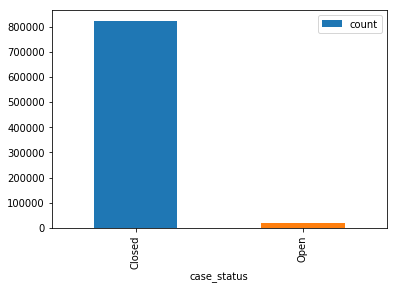

In [7]:
pdf.plot.bar(x, y="count")


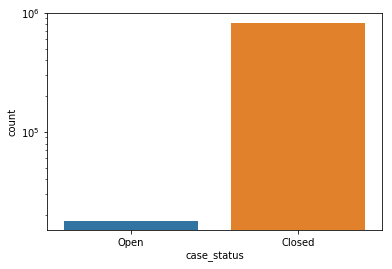

In [8]:
order = ["Open", "Closed"]  # desired order of categories
sns.barplot(x, y="count", data=pdf, order=order)
plt.yscale('log')


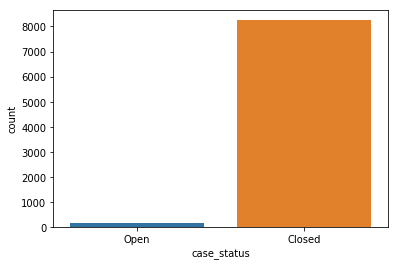

In [9]:
sns.countplot(x, data=pandas_df, order=order)


In [10]:
x = "SLA_days"


In [11]:
spark_df.describe(x).show()


+-------+------------------+
|summary|          SLA_days|
+-------+------------------+
|  count|            841671|
|   mean| 59.25478976660636|
| stddev|174.52559467491596|
|    min|             0.125|
|    max|             999.0|
+-------+------------------+



In [12]:
spark_df.agg(skewness(x), kurtosis(x)).show()


+------------------+------------------+
|skewness(SLA_days)|kurtosis(SLA_days)|
+------------------+------------------+
| 4.983687199032779|23.983570974325893|
+------------------+------------------+



In [13]:
pdf = spark_df.select(x). \
  dropna(). \
  sample(False, 0.01). \
  toPandas()
# pdf.head()

In [14]:
print(pdf.info())
print(pdf.head())
pdf[x] = pd.to_numeric(pdf[x])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8532 entries, 0 to 8531
Data columns (total 1 columns):
SLA_days    8532 non-null object
dtypes: object(1)
memory usage: 66.7+ KB
None
             SLA_days
0         16.04744213
1               0.125
2  2.7514814810000003
3                 0.5
4         15.62653935


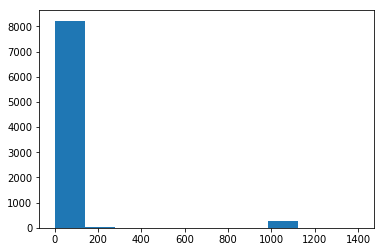

In [15]:
plt.hist(pdf[x])
plt.show()

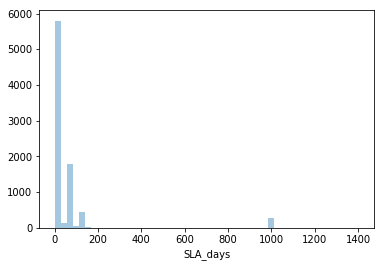

In [16]:
sns.distplot(pdf[x], kde=False)
plt.show()

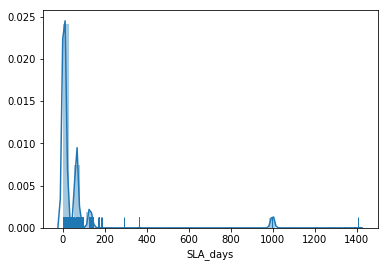

In [17]:
sns.distplot(pdf[x], kde=True, rug=True)


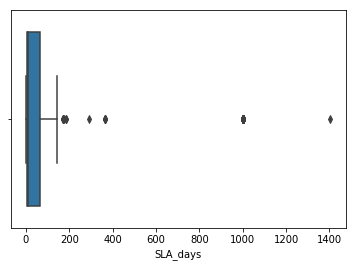

In [18]:
sns.boxplot(x, data=pdf)


In [19]:
x = "council_district"
z = "case_late"


In [20]:
sdf = spark_df.groupBy(x, z).count().orderBy(x, z)
sdf.show()


+----------------+---------+------+
|council_district|case_late| count|
+----------------+---------+------+
|               0|       NO|  3276|
|               0|      YES|   554|
|               1|       NO|107794|
|               1|      YES| 11515|
|              10|       NO| 56025|
|              10|      YES|  6901|
|               2|       NO|100173|
|               2|      YES| 14572|
|               3|       NO| 90907|
|               3|      YES| 11799|
|               4|       NO| 84631|
|               4|      YES|  9147|
|               5|       NO|102928|
|               5|      YES| 11681|
|               6|       NO| 64058|
|               6|      YES| 10037|
|               7|       NO| 63094|
|               7|      YES|  9351|
|               8|       NO| 37628|
|               8|      YES|  4717|
+----------------+---------+------+
only showing top 20 rows



In [21]:
pdf = sdf.toPandas()
pdf

,council_district,case_late,count
0,0,NO,3276
1,0,YES,554
2,1,NO,107794
3,1,YES,11515
4,10,NO,56025
5,10,YES,6901
6,2,NO,100173
7,2,YES,14572
8,3,NO,90907
9,3,YES,11799


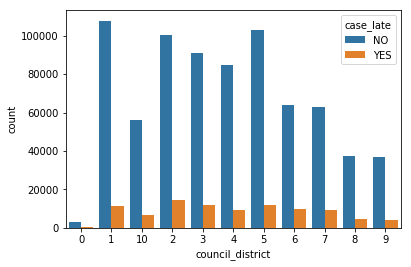

In [22]:
sns.barplot(x, y="count", hue=z, data=pdf)


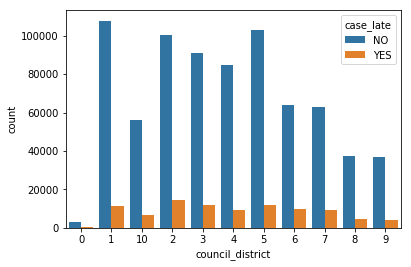

In [23]:
pdf = sdf.fillna("other/unknown").toPandas()
sns.barplot(x, y="count", hue=z, data=pdf)

In [24]:
x = "dept_division"
y = "SLA_days"

In [25]:
spark_df.groupBy(x). \
    agg(count(y), mean(y), stddev(y)). \
    orderBy(x). \
    show(5)

+--------------------+---------------+------------------+---------------------+
|       dept_division|count(SLA_days)|     avg(SLA_days)|stddev_samp(SLA_days)|
+--------------------+---------------+------------------+---------------------+
|     311 Call Center|           2849| 8.050333019700954|   1.7190007222063597|
|               Brush|          18212| 7.624494589446555|     3.38475153846676|
|     Clean and Green|           1248| 6.675153254474361|    4.515779720725676|
|Clean and Green N...|             82| 7.808043558000003|    1.589338370125451|
|    Code Enforcement|         272305|56.071701766366886|    36.34313500309739|
+--------------------+---------------+------------------+---------------------+
only showing top 5 rows



In [26]:
sample_pdf = spark_df.select(x, y). \
  sample(False, 0.01, 12345). \
  toPandas()

In [27]:
sample_pdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8422 entries, 0 to 8421
Data columns (total 2 columns):
dept_division    8422 non-null object
SLA_days         8422 non-null object
dtypes: object(2)
memory usage: 131.7+ KB


In [28]:
sample_pdf['SLA_days'] = pd.to_numeric(sample_pdf.SLA_days)


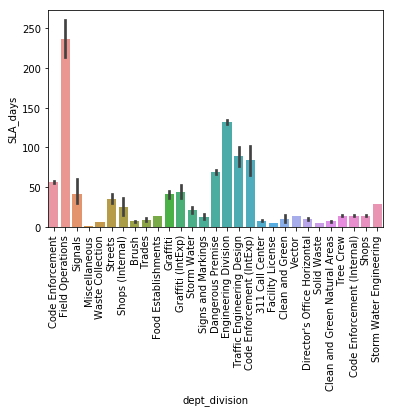

In [29]:
sns.barplot(x, y, data=sample_pdf)
plt.xticks(rotation=90)
plt.show()

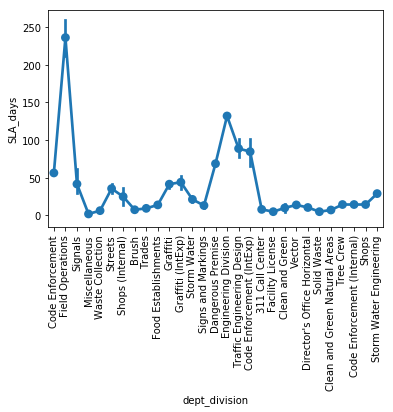

In [30]:
sns.pointplot(x, y, data=sample_pdf)
plt.xticks(rotation=90)
plt.show()

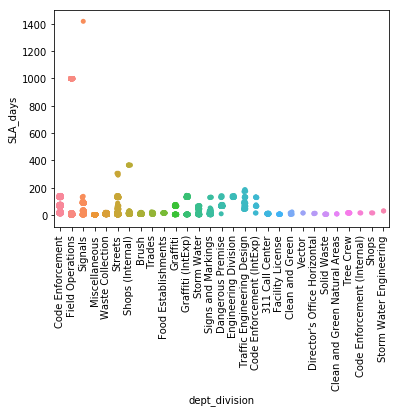

In [31]:
sns.stripplot(x, y, data=sample_pdf, jitter=True)
plt.xticks(rotation=90)
plt.show()

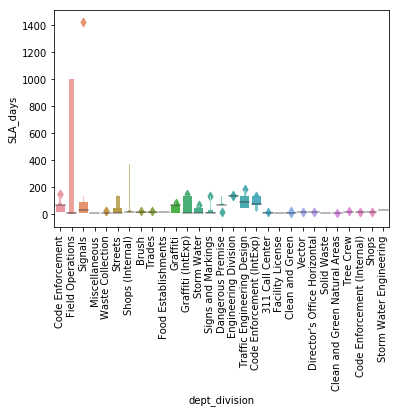

In [32]:
sns.lvplot(x, y, data=sample_pdf)
plt.xticks(rotation=90)
plt.show()

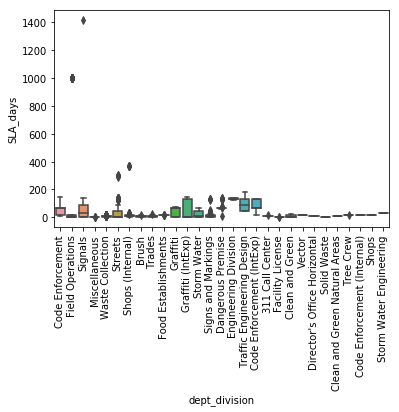

In [33]:
sns.boxplot(x, y, data=sample_pdf)
plt.xticks(rotation=90)
plt.show()

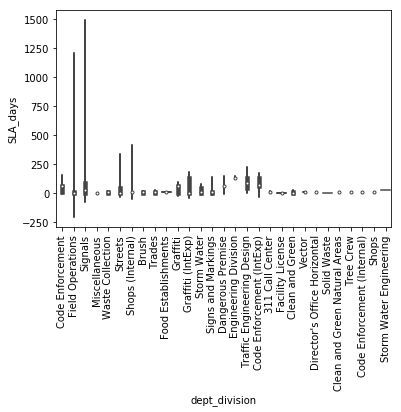

In [34]:
sns.violinplot(x, y, data=sample_pdf)
plt.xticks(rotation=90)
plt.show()

In [35]:
x = "num_days_late"
y = "SLA_days"

In [36]:
sdf = spark_df.agg(corr(x, y),
              covar_samp(x, y),
              covar_pop(x, y))

In [37]:
sdf.toPandas().transpose()


,0
"corr(num_days_late, SLA_days)",-0.988302
"covar_samp(num_days_late, SLA_days)",-30448.609474
"covar_pop(num_days_late, SLA_days)",-30448.573298


In [38]:
sample_pdf = spark_df.select(x, y). \
  sample(False, 0.01, 12345). \
  toPandas()

sample_pdf[x] = pd.to_numeric(sample_pdf[x])
sample_pdf[y] = pd.to_numeric(sample_pdf[y])


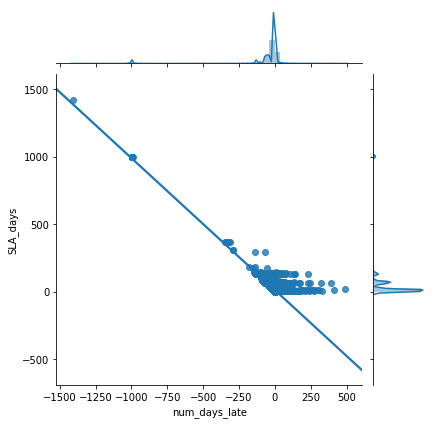

In [39]:
sns.jointplot(x, y, data=sample_pdf, kind="reg")
plt.show()

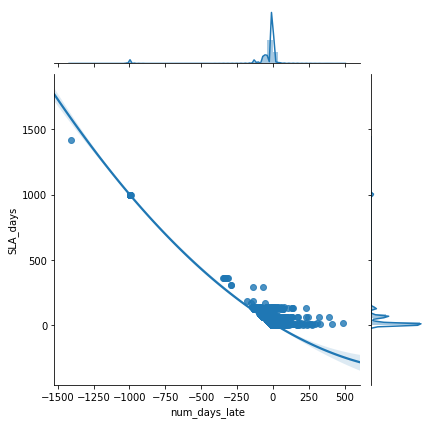

In [40]:
sns.jointplot(x, y, data=sample_pdf, kind="reg", order=2)
plt.show()

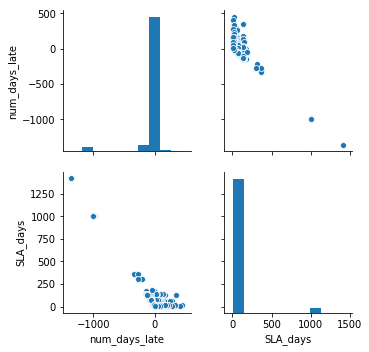

In [41]:
tmp_pdf = spark_df. \
  select(col(x).cast("float"), col(y).cast("float")). \
  sample(False, 0.01). \
  toPandas()
sns.pairplot(tmp_pdf)

In [43]:
x1 = "case_late"
x2 = "case_closed"
x3 = "council_district"
y1 = "num_days_late"
y2 = "SLA_days"

In [44]:
spark_df.groupby(x1,x2,x3). \
  count(). \
  show()

+---------+-----------+----------------+-----+
|case_late|case_closed|council_district|count|
+---------+-----------+----------------+-----+
|       NO|         NO|               1| 1536|
|       NO|        YES|               8|37109|
|      YES|        YES|               8| 4452|
|      YES|         NO|               3|  840|
|      YES|        YES|               1|10779|
|      YES|        YES|               9| 3948|
|       NO|        YES|               4|83523|
|      YES|         NO|               9|  281|
|       NO|        YES|               2|98372|
|       NO|         NO|               4| 1108|
|       NO|        YES|               6|62731|
|       NO|         NO|               6| 1327|
|       NO|         NO|               2| 1801|
|       NO|        YES|               0| 3227|
|      YES|        YES|               4| 8411|
|      YES|        YES|               7| 8894|
|      YES|        YES|               0|  517|
|      YES|         NO|               4|  736|
|      YES|  

In [45]:
spark_df.cube(x1,x2). \
  agg(grouping_id(), mean(y1), stddev(y1)). \
  orderBy(x1, x2). \
  show()

+---------+-----------+-------------+-------------------+--------------------------+
|case_late|case_closed|grouping_id()| avg(num_days_late)|stddev_samp(num_days_late)|
+---------+-----------+-------------+-------------------+--------------------------+
|     null|       null|            3|-49.074867583697205|        176.53002498187413|
|     null|         NO|            2|  -9.09733738151573|           96.998327067209|
|     null|        YES|            2| -49.95252967719666|        177.77680743862172|
|       NO|       null|            1| -58.49713051774848|        184.39797239177227|
|       NO|         NO|            0| -53.77566981441864|         82.78607258424773|
|       NO|        YES|            0| -58.57130168391601|        185.54988897471898|
|      YES|       null|            1|  25.42026327891507|         49.59320933377148|
|      YES|         NO|            0|  70.02952998931192|          64.3260782386731|
|      YES|        YES|            0|  22.11176041131918|        

In [46]:
spark_df.groupBy(x1, x2). \
  agg(corr(y1, y2)). \
  orderBy(x1). \
  show()

+---------+-----------+-----------------------------+
|case_late|case_closed|corr(num_days_late, SLA_days)|
+---------+-----------+-----------------------------+
|       NO|         NO|          -0.9405426842862277|
|       NO|        YES|          -0.9976264563884775|
|      YES|        YES|          0.24758823875617345|
|      YES|         NO|         -0.08660806771227425|
+---------+-----------+-----------------------------+



In [47]:
pandas_df[x1] = pandas_df[x1].fillna("missing")


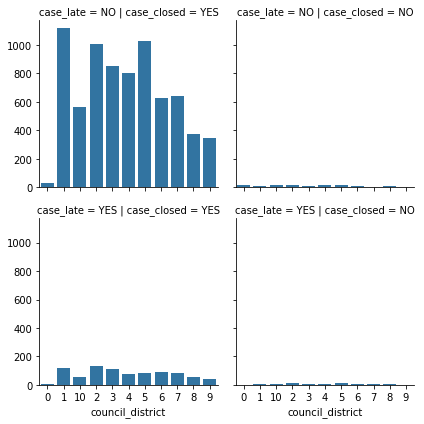

In [48]:
def tmp_plot():
  g = sns.FacetGrid(data=pandas_df, row=x1, col=x2)
  g = g.map(sns.countplot, x3)
tmp_plot()

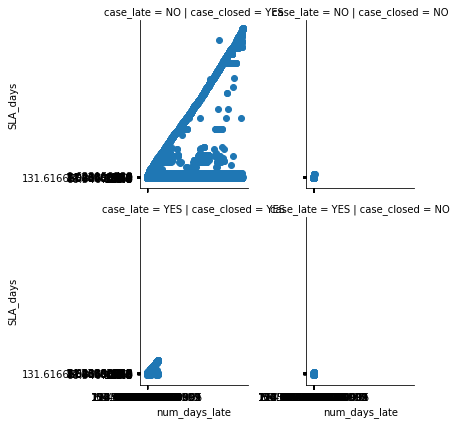

In [49]:
def tmp_plot(): 
  g = sns.FacetGrid(data=pandas_df, row=x1, col=x2)
  g = g.map(plt.scatter, y1, y2)
tmp_plot()

### Explore the distribution of y1


### Explore the distribution of y2



### Explore the relationship between y1 and x1.



In [ ]:
spark.stop()
